# Predicting Breast Cancer in a patient

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [111]:
breast_cancer = pd.read_csv("cancer.csv")

In [112]:
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [113]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [114]:
breast_cancer.shape

(569, 33)

In [115]:
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [116]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [117]:
breast_cancer.shape

(569, 33)

## Column 32 having 0 non-null values, droping the column

In [118]:
cancer = breast_cancer.dropna(axis=1)

In [119]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [120]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


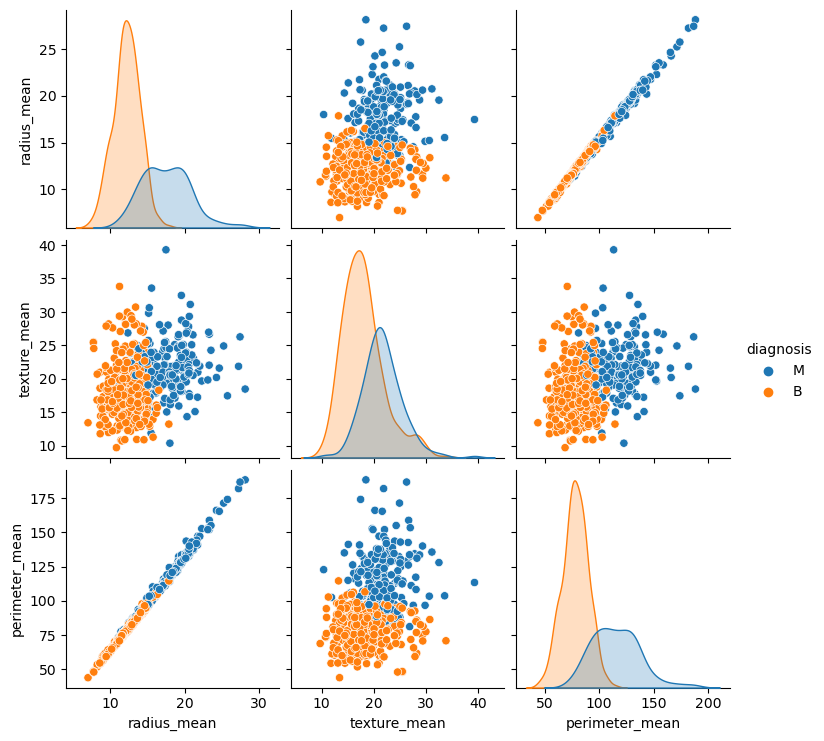

In [121]:
sns.pairplot(cancer.iloc[:,1:5], hue="diagnosis")

# Heatmap

<Axes: >

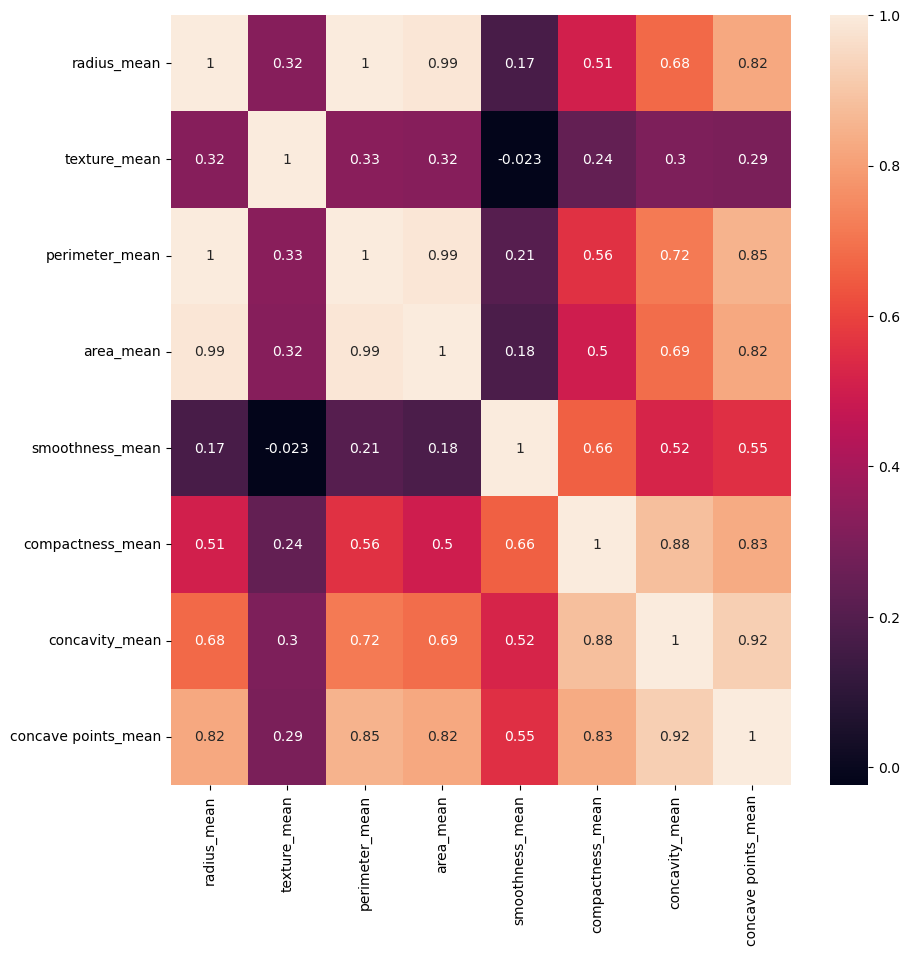

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(cancer.iloc[:,1:10].corr(), annot=True)

In [123]:
# malignant <M> and Benign <B>
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, f1_score

In [125]:
x = cancer.drop(["diagnosis"], axis=1)
y = cancer["diagnosis"]

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 20, stratify = y)

In [127]:
x_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
163,8712064,12.34,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,...,13.580,28.68,87.36,553.0,0.14520,0.23380,0.16880,0.08194,0.2268,0.09082
503,915143,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.100300,0.1505,...,30.790,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
240,88350402,13.64,15.60,87.38,575.3,0.09423,0.06630,0.047050,0.037310,0.1717,...,14.850,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510
307,89346,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
384,902727,13.28,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,0.1617,...,14.240,17.37,96.59,623.7,0.11660,0.26850,0.28660,0.09173,0.2736,0.07320


In [128]:
x_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
423,906878,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,0.1848,...,15.14,25.50,101.40,708.8,0.1147,0.3167,0.36600,0.14070,0.2744,0.08839
458,9112594,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
264,889719,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.58,29.33,140.50,1436.0,0.1558,0.2567,0.38890,0.19840,0.3216,0.07570
76,8610629,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,...,14.08,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.2710,0.07191
452,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194


In [129]:
y_train.head()

163    B
503    M
240    B
307    B
384    B
Name: diagnosis, dtype: object

In [130]:
y_test.head()

423    B
458    B
264    M
76     B
452    B
Name: diagnosis, dtype: object

# 'Benign' means that the cells are not harmful or there is no cancer 

# 'Malignant' means that the patient has cancer and the cells have a harmful effect

# GradientBoostingClassifier

In [131]:
gb = gbc()

gb.fit(x_train, y_train)

pred = gb.predict(x_test)

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label='B')
recall = recall_score(y_test, pred, pos_label='B')
f1 = f1_score(y_test, pred, pos_label='B')

print("---GradientBoostingClassifier results---")
print("     ")
print("accuracy_score  : ",accuracy)  
print("f1_score        : ",f1)
print("precision_score : ",precision)
print("recall_score    : ",recall)

---GradientBoostingClassifier results---
     
accuracy_score  :  0.9649122807017544
f1_score        :  0.9722222222222222
precision_score :  0.9722222222222222
recall_score    :  0.9722222222222222


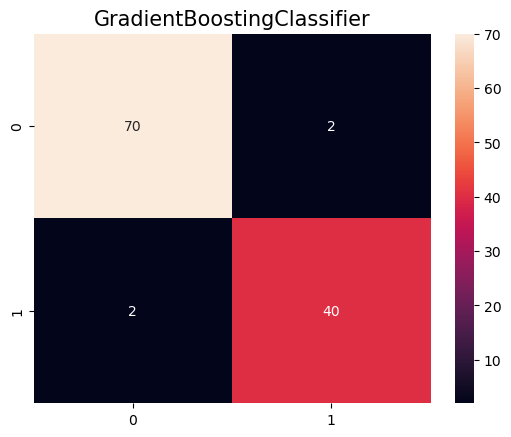

In [132]:
cm = confusion_matrix(y_test, pred)
#print(cm)
plt.title("GradientBoostingClassifier", fontsize = 15)
sns.heatmap(cm, annot=True )
plt.show()

# RandomForestClassifier

In [133]:
rf = rfc()

rf.fit(x_train, y_train)

pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label='B')
f1 = f1_score(y_test, pred, pos_label='B')
recall = recall_score(y_test, pred, pos_label='B')

print("----RandomForestClassifier results----")
print("    ")
print("accuracy_score  : ",accuracy)  
print("f1_score        : ",f1)
print("precision_score : ",precision)
print("recall_score    : ",recall)        

----RandomForestClassifier results----
    
accuracy_score  :  0.9736842105263158
f1_score        :  0.979020979020979
precision_score :  0.9859154929577465
recall_score    :  0.9722222222222222


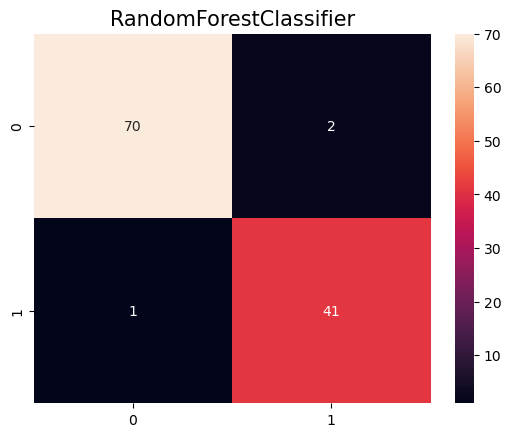

In [134]:
cm = confusion_matrix(y_test, pred)
#print(cm)
plt.title("RandomForestClassifier", fontsize = 15)
sns.heatmap(cm, annot=True )
plt.show()

# Support Vector Classifier

In [135]:
classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, pos_label='B')
recall = recall_score(y_test, pred, pos_label = 'B')
precision = precision_score(y_test, pred, pos_label = 'B')

print("----Support Vector Machine Classifier results----")
print("    ")
print("accuracy_score  : ",accuracy)  
print("f1_score        : ",f1)
print("precision_score : ",precision)
print("recall_score    : ",recall) 

----Support Vector Machine Classifier results----
    
accuracy_score  :  0.631578947368421
f1_score        :  0.7741935483870968
precision_score :  0.631578947368421
recall_score    :  1.0


# Performing roc_auc_score

In [136]:
le = LabelEncoder()

In [137]:
y_train = le.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns = ['dignosis'])
y_train.value_counts()

dignosis
0           285
1           170
dtype: int64

In [138]:
y_test = le.transform(y_test)
y_test = pd.DataFrame(y_test, columns = ['dignosis'])
y_test.value_counts()

dignosis
0           72
1           42
dtype: int64

In [140]:
# RandomForestClassifier

rf = rfc()

rf.fit(x_train, y_train)

pred = rf.predict(x_test)

roc_auc = roc_auc_score(y_test, pred)

print(roc_auc)

0.9623015873015873


In [141]:
# GradientBoostingClassifier

gb = gbc()

gb.fit(x_train, y_train)

pred = gb.predict(x_test)

roc_auc = roc_auc_score(y_test, pred)

print(roc_auc)

0.9623015873015873


# Predicting whether patient has breast cancer or not.

In [142]:
rf = rfc()

rf.fit(x_train, y_train)

pred = rf.predict(x_test)

# pred[change the patient index between 1 to 114] 

if pred[1] == 1:
    print("The patient has breast cancer (Malignant)")
else:
    print("The patient does not have breast cancer (Benign)")

The patient does not have breast cancer (Benign)
